## Processing tensorboard logs
The codes below read all scalar values from the the model tensorboard logs, and analye the statistics.

In [2]:
import os
from datetime import datetime
from tqdm import tqdm
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

def read_tensorboard_scalars(log_folder, topics=None):
    """
    Reads scalar time series from a TensorBoard event file in the given folder.
    Returns a dictionary where the key is the scalar name and the value is a list of values.

    Parameters:
    - log_folder: Path to the folder containing the TensorBoard event file.
    - topics: Optional. A list of scalar tags (topics) to filter. If None, all topics are returned.

    Returns:
    - A dictionary where the key is the scalar tag and the value is a list of scalar values.
    """
    event_file = [f for f in os.listdir(log_folder) if f.startswith("events.out.tfevents")]
    if not event_file:
        return None  # No event file found
    event_file_path = os.path.join(log_folder, event_file[0])
    event_acc = EventAccumulator(event_file_path)
    event_acc.Reload()

    scalars = {}
    all_tags = event_acc.Tags().get("scalars", [])
    tags_to_read = topics if topics else all_tags  # If topics are specified, filter by them; otherwise, use all tags

    for tag in tags_to_read:
        if tag in all_tags:  # Only process tags that exist in the log file
            scalar_events = event_acc.Scalars(tag)
            scalars[tag] = [event.value for event in scalar_events]  # Collect only the values

    return scalars

def parse_datetime(folder_name):
    """
    Parses a folder name in the format 'YYYY-MM-DD_HH-MM-SS' and returns a datetime object.
    Returns None if the parsing fails.
    """
    try:
        return datetime.strptime(folder_name, "%Y-%m-%d_%H-%M-%S")
    except ValueError:
        return None

def process_training_results(base_folder, step_index):
    """
    Given a base folder, find the latest date-time subfolder for each "Gendogx" folder,
    read the TensorBoard logs, and return a mapping from "Gendogx" to their scalar dictionaries.
    """
    results = {}
    folders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f)) and f.startswith("Gendog")]

    # Progress bar
    with tqdm(total=len(folders), desc="Processing Gendog folders", unit="folder") as pbar:
        for folder in folders:
            folder_path = os.path.join(base_folder, folder)

            # Find the latest date-time subfolder
            subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
            dated_subfolders = [(subfolder, parse_datetime(subfolder)) for subfolder in subfolders]
            dated_subfolders = [(name, dt) for name, dt in dated_subfolders if dt is not None]

            if not dated_subfolders:
                pbar.update(1)
                continue

            # Sort subfolders by datetime and take the latest
            latest_subfolder = max(dated_subfolders, key=lambda x: x[1])[0]
            latest_path = os.path.join(folder_path, latest_subfolder)

            # Read TensorBoard scalars
            scalars = read_tensorboard_scalars(latest_path, topics=["Train/mean_return", "Train/mean_episode_length"])
            if scalars is not None and "Train/mean_return" in scalars and len(scalars["Train/mean_return"]) > step_index:
                results[folder] = scalars

            pbar.update(1)

    return results

def plot_finished_trainings(results, step_index, save_path=None):
    """
    Plots a histogram of the specified step index 'Train/mean_return' for all completed trainings.
    Optionally saves the plot to a specified path.

    Args:
        results (dict): Dictionary containing training results.
        step_index (int): Step index to plot.
        save_path (str, optional): Path to save the figure. If None, the figure is not saved.
    """
    finished_returns = []
    for folder, scalars in results.items():
        if "Train/mean_return" in scalars and len(scalars["Train/mean_return"]) > step_index:
            finished_returns.append(scalars["Train/mean_return"][step_index])

    print(f"Total trainings completed: {len(finished_returns)}")
    if finished_returns:
        plt.hist(finished_returns, bins=30, edgecolor='black')
        plt.title(f"Histogram of 'Train/mean_return' (Step {step_index})")
        plt.xlabel("Mean Return")
        plt.ylabel("Frequency")

        if save_path:
            plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
            print(f"Figure saved to {save_path}")

        plt.show()


In [ ]:
results = process_training_results("../logs/rsl_rl", 7998)

Total trainings completed: 202
Figure saved to reward_his.jpg


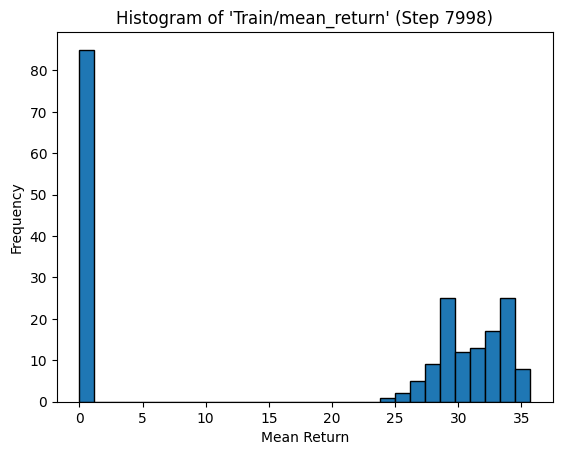

In [3]:
plot_finished_trainings(results, 7998, "reward_his.jpg")

In [8]:
[(type(k), len(v)) for k, v in results.items()]

[(str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),
 (str, 2),

In [10]:
results.keys()

dict_keys(['Gendog158_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr1_rl0_rr0_0_8__Geo_lengthen_thigh_1_2', 'Gendog19_gendog__KneeNum_fl1_fr1_rl1_rr1__ScaleJointLimit_fl0_fr0_rl0_rr0_1_0__Geo_lengthen_calf_1_2', 'Gendog67_gendog__KneeNum_fl1_fr1_rl1_rr1__ScaleJointLimit_fl0_fr0_rl1_rr1_1_2__Geo_scale_all_1_2', 'Gendog295_gendog__KneeNum_fl3_fr3_rl3_rr3__ScaleJointLimit_fl1_fr0_rl1_rr0_1_2__Geo_lengthen_calf_0_8', 'Gendog239_gendog__KneeNum_fl3_fr3_rl3_rr3__ScaleJointLimit_fl1_fr0_rl0_rr0_0_8__Geo_lengthen_calf_1_2', 'Gendog207_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl1_rr0_0_8__Geo_lengthen_calf_0_8', 'Gendog168_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl0_fr0_rl1_rr1_1_2__Geo_lengthen_thigh_1_6', 'Gendog213_gendog__KneeNum_fl3_fr3_rl3_rr3__ScaleJointLimit_fl0_fr0_rl0_rr0_1_0__Geo_lengthen_thigh_1_2', 'Gendog208_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl1_rr0_0_8__Geo_lengthen_calf_0_4', 'Gendog233_gendog__KneeNum_fl3_fr3_rl3_rr3__Sca

In [12]:
threshold = 0.5  # Replace with your desired threshold
sorted_keys = sorted(results.keys(), key=lambda k: int(k.split("_")[0].replace("Gendog", "")))

# Check rewards and print those below the threshold
for key in sorted_keys:
    if "Train/mean_return" in results[key] and results[key]["Train/mean_return"][-1] < threshold:
        print(f"{key}: {results[key]['Train/mean_return'][-1]}", results[key]["Train/mean_return"][-1])


Gendog115_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl0_fr0_rl0_rr0_1_0__Geo_lengthen_thigh_0_8: 0.0 0.0
Gendog116_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl0_fr0_rl0_rr0_1_0__Geo_lengthen_thigh_0_4: 0.0 0.0
Gendog117_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl0_fr0_rl0_rr0_1_0__Geo_lengthen_calf_1_6: 0.0 0.0
Gendog118_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl0_fr0_rl0_rr0_1_0__Geo_lengthen_calf_1_2: 0.0 0.0
Gendog126_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl0_rr0_1_2__Geo_lengthen_thigh_0_8: 0.0 0.0
Gendog127_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl0_rr0_1_2__Geo_lengthen_thigh_0_4: 0.0 0.0
Gendog128_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl0_rr0_1_2__Geo_lengthen_calf_1_6: 0.0 0.0
Gendog129_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl0_rr0_1_2__Geo_lengthen_calf_1_2: 0.0 0.0
Gendog132_gendog__KneeNum_fl2_fr2_rl2_rr2__ScaleJointLimit_fl1_fr0_rl0_rr0_0_8__Geo_scale_all_1_0: 0.0 0.0
G

## Multi-thread processing
We can also attempt to use multithreading to process the tensorboard files, though they don't seem to be faster in practice... 

In [ ]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from datetime import datetime
import os

def process_single_folder(folder_path):
    """
    Process a single Gendog folder to find the latest date-time subfolder and read its TensorBoard logs.
    Returns the folder name and its scalar dictionary.
    """
    folder_name = os.path.basename(folder_path)
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    dated_subfolders = [(subfolder, parse_datetime(subfolder)) for subfolder in subfolders]
    dated_subfolders = [(name, dt) for name, dt in dated_subfolders if dt is not None]
    
    if not dated_subfolders:
        return folder_name, None
    
    # Find the latest date-time subfolder
    latest_subfolder = max(dated_subfolders, key=lambda x: x[1])[0]
    latest_path = os.path.join(folder_path, latest_subfolder)
    
    # Read TensorBoard scalars
    scalars = read_tensorboard_scalars(latest_path)
    return folder_name, scalars


def process_training_results_multithreaded(base_folder, max_workers=4):
    """
    Multithreaded function to process Gendog folders and find the latest training results.
    """
    results = {}
    folders = [os.path.join(base_folder, f) for f in os.listdir(base_folder) 
               if os.path.isdir(os.path.join(base_folder, f)) and f.startswith("Gendog")]
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Submit tasks
        future_to_folder = {executor.submit(process_single_folder, folder): folder for folder in folders}
        
        # Use tqdm for progress bar
        with tqdm(total=len(folders), desc="Processing Gendog folders", unit="folder") as pbar:
            for future in as_completed(future_to_folder):
                folder_name, scalars = future.result()
                if scalars is not None:
                    results[folder_name] = scalars
                pbar.update(1)
    
    return results

results = process_training_results_multithreaded(base_folder, max_workers=16)  # Use 8 threads